In [1]:
pip install geneticalgorithm

In [2]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
from math import pi
from scipy.integrate import odeint
import matplotlib.pyplot as plt


In [3]:

def z1_fun(t):
  return 0.02*(1-(np.cos(100*pi*t))**2)*(1-np.heaviside(t-0.01, 0.5))

def dz1dt_fun(t):
  return - 4*pi*np.cos(100*pi*t)*np.sin(100*pi*t)*(np.heaviside(t - 1/100,1) - 1)

def z2_fun(t):
  return 0.02*(1-(np.cos((100*pi)*(t-0.05)))**2)*(1-np.heaviside(t-0.06,0.5))*np.heaviside(t-0.05,0.5);

def dz2dt_fun(t):
  return -4*pi*np.heaviside(t - 1/20,0.5)*np.cos(100*pi*(t - 1/20))*np.sin(100*pi*(t - 1/20))*(np.heaviside(t - 3/50,0.5) - 1)

def RMS(x):
  return (np.sum(x**2)/np.size(x))**0.5

In [4]:
L=3
a=1.3
I=225
ma=25
ms=300

def pend(y,t,C_K_vec):
  z1=z1_fun(t)
  dz1dt=dz1dt_fun(t)
  z2=z2_fun(t)
  dz2dt=dz2dt_fun(t)

  c1,c2,c3,c4,k1,k2,k3,k4=C_K_vec

  dydt=np.zeros(np.shape(y))
  dydt[0]=y[4]
  dydt[1]=y[5]
  dydt[2]=y[6]
  dydt[3]=y[7]

  
  dydt[4]=(-1/I)*((a**2*k1+(L-a)**2*k2)*y[0]+(k1*a-k2*(L-a))*y[1]-k1*a*y[2]+k2*(L-a)*y[3]+
                  (a**2*c1+(L-a)**2*c2)*y[4]+(c1*a-c2*(L-a))*y[5]-c1*a*y[6]+c2*(L-a)*y[7])
  
  dydt[5]=(-1/ms)*((a*k1-(L-a)*k2)*y[0]+(k1+k2)*y[1]-k1*y[2]-k2*y[3]+
                   (a*c1-(L-a)*c2)*y[4]+(c1+c2)*y[5]-c1*y[6]-c2*y[7])
  
  dydt[6]=(-1/ma)*(-a*k1*y[0]-k1*y[1]+(k1+k3)*y[2]-
                   a*c1*y[4]-c1*y[5]+(c1+c3)*y[6]-
                   c3*dz1dt-k3*z1)
  
  dydt[7]=(-1/ma)*(k2*(L-a)*y[0]-k2*y[1]+(k2+k4)*y[3]+
                   c2*(L-a)*y[4]-c2*y[5]+(c2+c4)*y[7]-
                   c4*dz2dt-k4*z2)
  return dydt
  

In [5]:
global n
n=2000

def f(C_K_vec):
  z0=np.array([0,0.03,0,0,0,0,0,0])
  tspan= np.ndarray.tolist(np.linspace(0,2,n))
  y_vec=odeint(pend,z0,tspan,args=(C_K_vec,),atol=1.0e-5, rtol=1.0e-5)

  acc1=(-1/ms)*( ((C_K_vec[0]+C_K_vec[1])*a-C_K_vec[1]*L)*y_vec[:,4]+(C_K_vec[0]+C_K_vec[1])*y_vec[:,5]+(-C_K_vec[0])*y_vec[:,6]+(-C_K_vec[1])*y_vec[:,7]+
          ((C_K_vec[4]+C_K_vec[5])*a-C_K_vec[5]*L)*y_vec[:,0]+(C_K_vec[4]+C_K_vec[5])*y_vec[:,1]+(-C_K_vec[4])*y_vec[:,2]+(-C_K_vec[5])*y_vec[:,3] )

  return RMS(acc1)+5*RMS(y_vec[:,6])


Part 1

 The best solution found:
 [ 1908.  1096.   518.   535.  5186.  5086. 91116. 90110.]

 Objective function:
 0.359564395150214


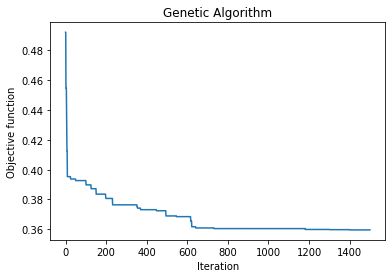

In [6]:
varbound=np.array([[500,2000],[500,2000],[500,2000],[500,2000],[5000,20000],[5000,20000],[90000,150000],[90000,150000]])


params={ 'max_num_iteration': 1500,'population_size': 100,'mutation_probability': 0.25,'elit_ratio': 0.01,
        'crossover_probability': 0.5,'parents_portion': 0.3,'crossover_type': 'uniform','max_iteration_without_improv': None }

model=ga(function=f,dimension=8,variable_type='int',variable_boundaries=varbound,algorithm_parameters = params)

model.run()

#15 min

Part 2

 The best solution found:
 [ 1832.  1105.   500.   500.  5017.  5015. 90072. 90006.]

 Objective function:
 0.3524045877822264


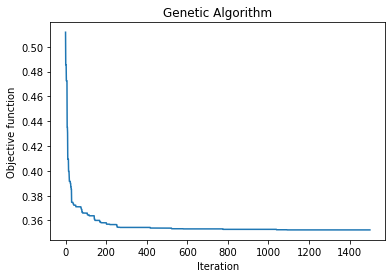

In [9]:
varbound=np.array([[500,2000],[500,2000],[500,2000],[500,2000],[5000,20000],[5000,20000],[90000,150000],[90000,150000]])


params={ 'max_num_iteration': 1500,'population_size': 100,'mutation_probability': 0.1,'elit_ratio': 0.03,
        'crossover_probability': 0.5,'parents_portion': 0.3,'crossover_type': 'uniform','max_iteration_without_improv': None }

model=ga(function=f,dimension=8,variable_type='int',variable_boundaries=varbound,algorithm_parameters = params)

model.run()